# Лабораторна робота 2 
## Прогнозування на основі експоненціального згладжування 

#### Варіант 26

#### Моделі (N, N) (N, M)

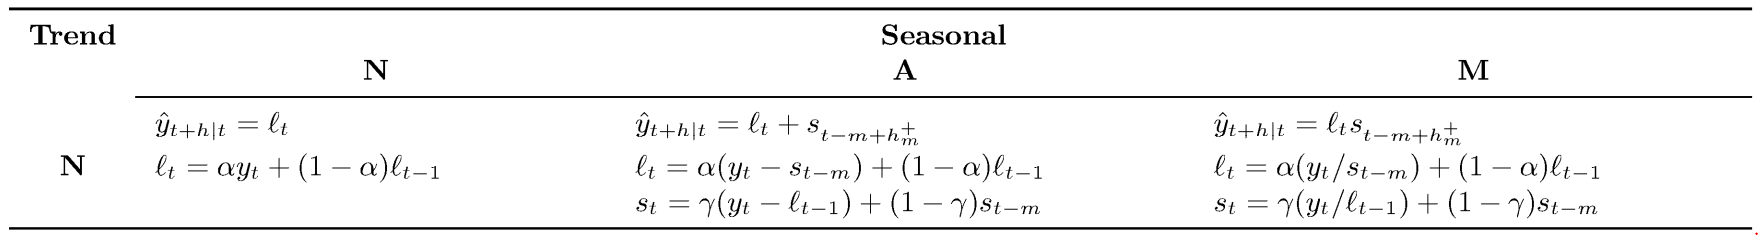


1. Побудуйте графік ряду і, виходячи з візуального аналізу, скажіть, чи є в ряді тренд та сезонність, який період сезонності (якщо вона є). 

2. Для кожної з двох моделей експоненціального згладжування, заданих в індивідуальному варіанті, виконайте наступне: 
    - Задайте параметри моделі. 
    - Виконайте згладжування ряду на основі моделі із заданими параметрами, додайте на графік з рядом отриманий згладжений ряд, розрахуйте середньоквадратичну похибку згладжування (RMSE).
    - Спробуйте поекспериментувати з параметрами і оберіть такі значення параметрів, за яких середньоквадратична похибка згладжування буде мінімальною.
    - Виконайте прогнозування на основі моделі з підібраними параметрами мінімум на 3 кроки вперед. Якщо працюєте з моделлю, що враховує сезонність, то кількість кроків прогнозування має бути не менша, ніж період сезонності. 
    - Додайте до графіку з часовим рядом отримані прогнози. 
    - Оцініть помилку прогнозування на основі техніки ковзного контролю (як це робили в лабораторній роботі 1). Розрахуйте при цьому метрики MAE та RMSE. Додатково за бажанням можете розрахувати AIC чи BIC для моделі. 

3. Яка з двох моделей дає якісніші прогнози? Для відповіді на це питання проаналізуйте побудовані графіки та порівняйте метрики якості MAE і RMSE для двох моделей (а також AIC, BIC, якщо їх розраховували).

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import sys

In [79]:
df = pd.read_csv('data.txt', sep=' ')
df['date'] = pd.to_datetime(df['date'])
display(df)

,date,value
0,2013-01-01,486
1,2013-02-01,480
2,2013-03-01,686
3,2013-04-01,743
4,2013-05-01,843
5,2013-06-01,845
6,2013-07-01,911
7,2013-08-01,805
8,2013-09-01,733
9,2013-10-01,736


### 1. Побудуйте графік ряду і, виходячи з візуального аналізу, скажіть, чи є в ряді тренд та сезонність, який період сезонності (якщо вона є). 

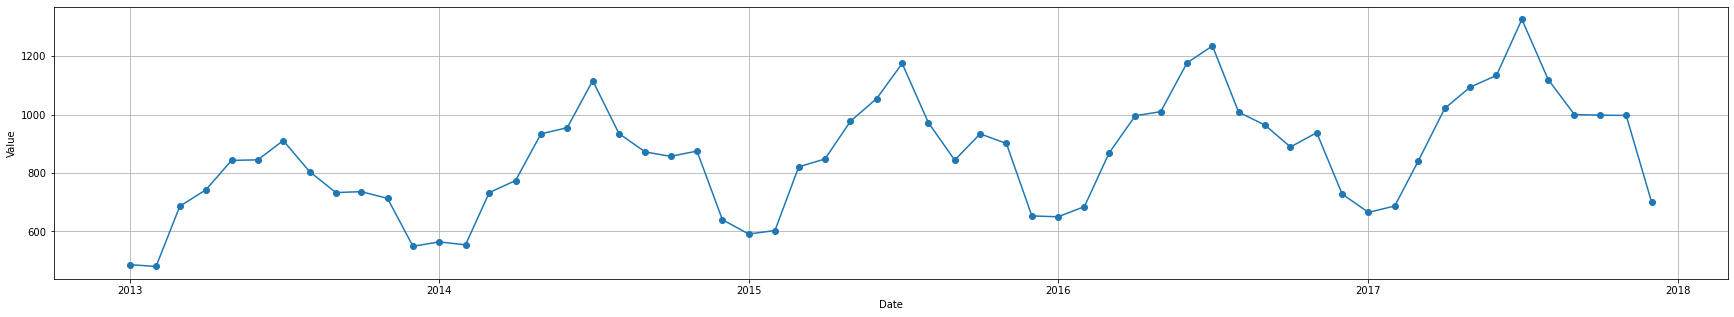

In [80]:
plt.figure(figsize=(30,5))
plt.plot(df['date'], df['value'], marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#### Наявний лінійний висхідний тренд

#### Сезонність присутня. Період сезонності - один рік, 12 місяців

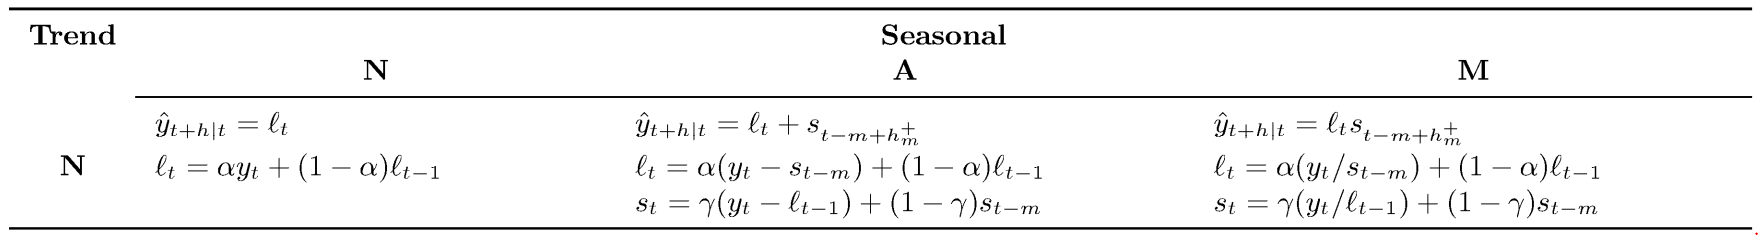

#### 2. Для кожної з двох моделей експоненціального згладжування, заданих в індивідуальному варіанті, виконайте наступне: 
####     - Задайте параметри моделі. 
####     - Виконайте згладжування ряду на основі моделі із заданими параметрами, додайте на графік з рядом отриманий згладжений ряд, розрахуйте середньоквадратичну похибку згладжування (RMSE).
####     - Спробуйте поекспериментувати з параметрами і оберіть такі значення параметрів, за яких середньоквадратична похибка згладжування буде мінімальною.
####     - Виконайте прогнозування на основі моделі з підібраними параметрами мінімум на 3 кроки вперед. Якщо працюєте з моделлю, що враховує сезонність, то кількість кроків прогнозування має бути не менша, ніж період сезонності. 
####     - Додайте до графіку з часовим рядом отримані прогнози. 
####     - Оцініть помилку прогнозування на основі техніки ковзного контролю (як це робили в лабораторній роботі 1). Розрахуйте при цьому метрики MAE та RMSE. Додатково за бажанням можете розрахувати AIC чи BIC для моделі. 

# Model (N, N)

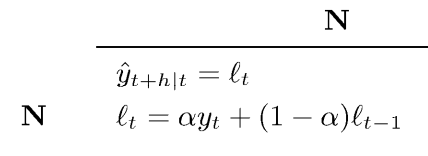

In [81]:
def N_N_chart(df, smoothed_values) :
    plt.figure(figsize=(30, 5))
    plt.plot(df['date'], df['value'], label='Values', marker='o')
    plt.plot(df['date'], smoothed_values, label='Smoothed values', marker='x')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Simple exponential smoothing')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

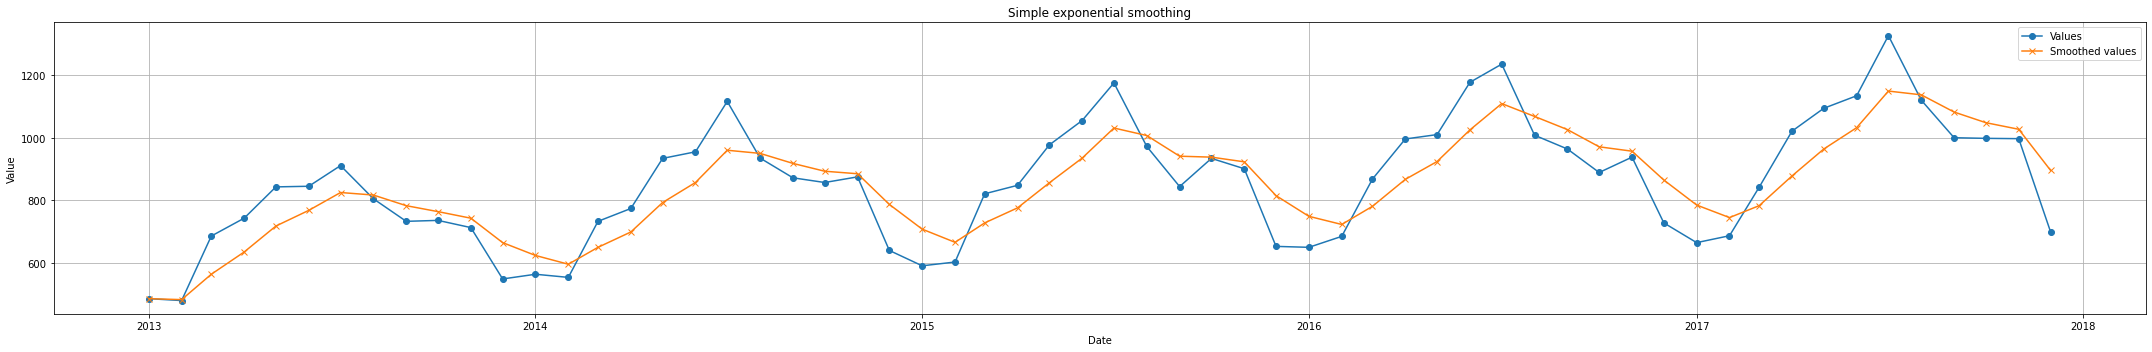

In [82]:
def exponential_smoothing_N_N(values, alpha, l0):
    l_t = pd.concat([pd.Series(values.iloc[0]), values], ignore_index=True)

    smoothed_values = pd.Series(index=values.index, dtype=float)
    
    for t in range(len(values)):
        l_t[t + 1] = alpha * values[t] + (1 - alpha) * l_t[t]
        smoothed_values[t] = l_t[t + 1]
    
    return smoothed_values

alpha = 0.4
l0 = df['value'][0]

smoothed_values_N_N = exponential_smoothing_N_N(df['value'], alpha, l0)

N_N_chart(df, smoothed_values_N_N)

alpha,RMSE
0.900000,127.325567


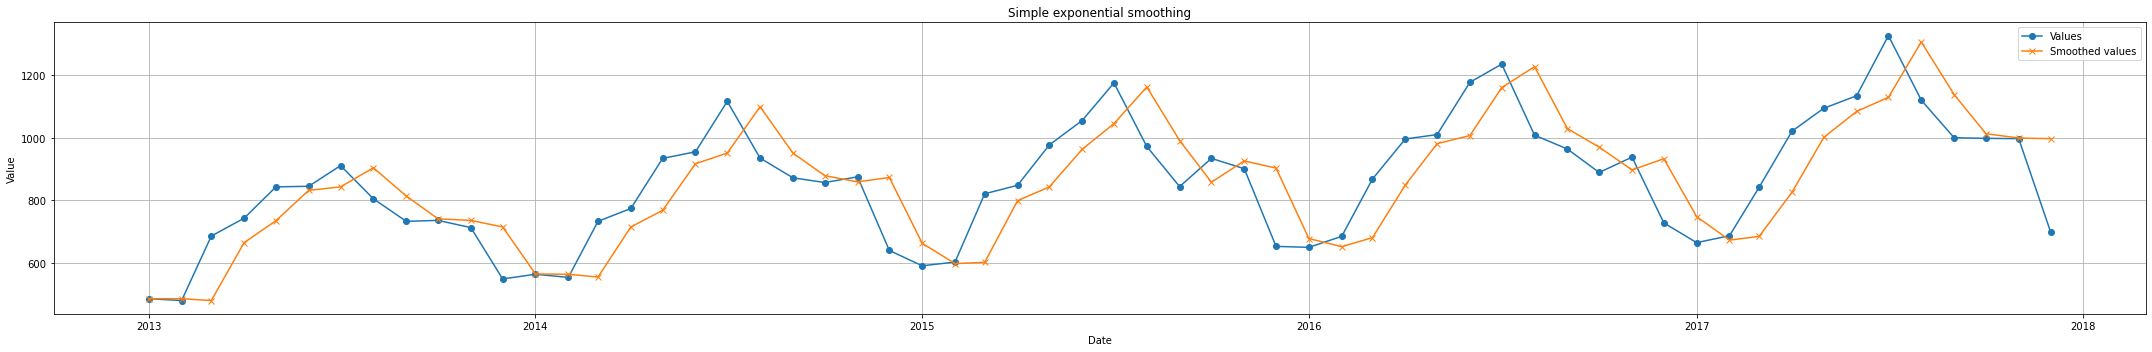

In [83]:
def N_N_fit(df) :
    l0 = df['value'][0]
    
    best_val = best_alpha = 0

    best_rmse = sys.float_info.max
    
    alphas = np.arange(0.1, 1, 0.1)

    for current_alpha in alphas: 
        
        smoothing_val = exponential_smoothing_N_N(df['value'], current_alpha, l0)
        
        current_val = pd.concat([pd.Series(smoothing_val[0]), smoothing_val], ignore_index=True)
        current_val = current_val.iloc[:-1]

        # current_rmse = np.sqrt(mean_squared_error(df['value'], current_val))
        # current_rmse = np.sqrt(mean_squared_error(smoothing_val, current_val))
        
        squared = [(df['value'][i] - current_val[i])**2 for i in range(len(smoothing_val))]
        current_rmse =  np.sqrt(np.sum(squared) / len(df['value']))

        if current_rmse < best_rmse :
            best_val = current_val
            best_rmse = current_rmse
            best_alpha = current_alpha
            
    return best_val, best_rmse, best_alpha

smoothed_values_N_N, rmse_N_N, alpha_N_N = N_N_fit(df)

table = pd.DataFrame(columns={"alpha" : 1,"RMSE": 2})
table.loc[len(table)] = [alpha_N_N, rmse_N_N]
display(table.style.hide_index()) 

N_N_chart(df, smoothed_values_N_N)

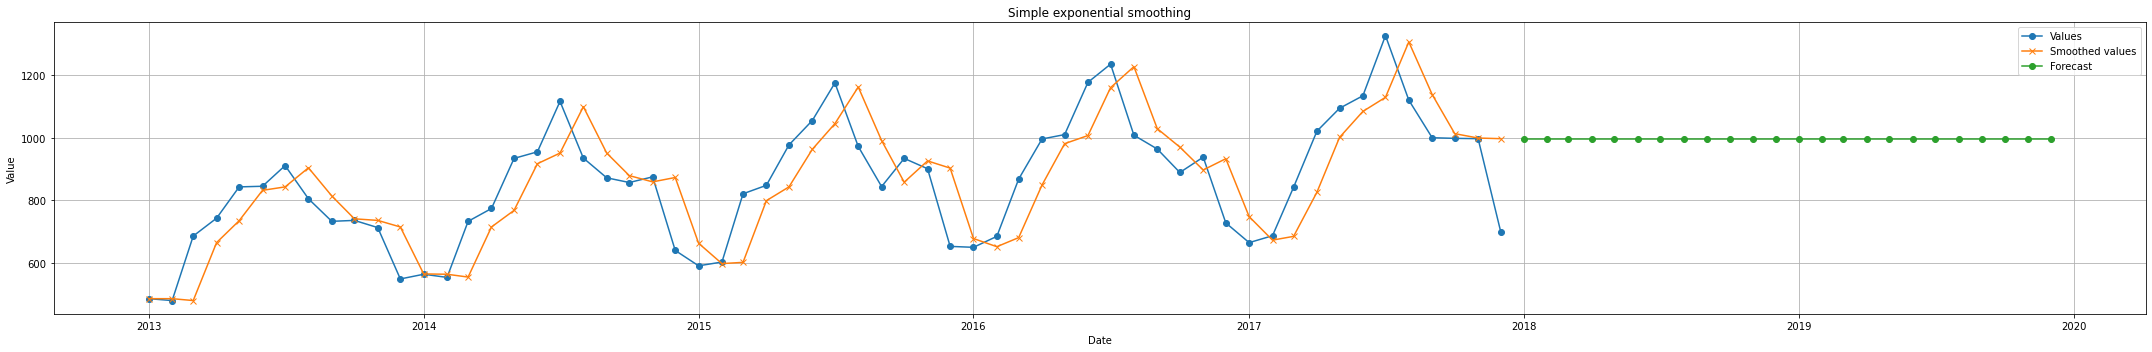

In [84]:
smoothed_last = smoothed_values_N_N.iloc[-1]

forecast_dates = pd.Series(pd.date_range(start=df['date'].iloc[-1], periods=25, freq='MS')[1:])

forecast_values_N_N = pd.Series([smoothed_last] * len(forecast_dates))

forecast_df_N_N = pd.DataFrame({'date': forecast_dates,
                            'value': forecast_values_N_N})

plt.figure(figsize=(30, 5))
plt.plot(df['date'], df['value'], label='Values', marker='o')
plt.plot(df['date'], smoothed_values_N_N, label='Smoothed values', marker='x')
plt.plot(forecast_df_N_N['date'], forecast_df_N_N['value'], label='Forecast', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Simple exponential smoothing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
def get_metrics_N_N(train, test, alpha) :
    for j in range(1, 4): 
    
        predictions = []

        for i in range(len(test)):
            smoothing_val = exponential_smoothing_N_N(train['value'], alpha, l0)
            
            forecast = smoothing_val[len(smoothing_val) - 1]

            predictions.append(forecast)
            train = pd.concat([train, test.iloc[[i]]])

        mae = mean_absolute_error(test['value'], predictions)
        rmse = np.sqrt(mean_squared_error(test['value'], predictions))
        
        X = sm.add_constant(test['value'])

        model = sm.OLS(predictions, X)
        results = model.fit()

        aic = results.aic
        bic = results.bic
    
        return mae, rmse, aic, bic, predictions

In [116]:
def get_metrics_N_N_2(train, test, alpha) :
    r_pred = []
    r_actual = []

    for i in range(len(test)):
        if i-3 > 1:
            break

        pred = []
        actual = []

        smoothing_val = exponential_smoothing_N_N(train['value'], alpha, l0)
            
        for k in range(1, 4): 
            pred.append(smoothing_val[len(smoothing_val) - 1])
            actual.append(test['value'].iloc[i+k-1])

        train = pd.concat([train, test.iloc[[i]]])

        r_pred.append(pred)
        r_actual.append(actual)

    reformatted_pred = [list(column) for column in zip(*r_pred)]
    reformatted_actual = [list(column) for column in zip(*r_actual)]

    print(r_pred)
    print(r_actual)
    print(reformatted_pred)
    print(reformatted_actual)

    table = pd.DataFrame(columns={"Step" : 1, "MAE": 2, "RMSE": 3, "AIC": 4, "BIC": 4})

    for i in range(len(reformatted_pred)):
        mae = mean_absolute_error(reformatted_actual[i], reformatted_pred[i])
        rmse = np.sqrt(mean_squared_error(reformatted_actual[i], reformatted_pred[i]))
        
        X = sm.add_constant(reformatted_actual[i])

        model = sm.OLS(reformatted_pred[i], X)
        results = model.fit()

        aic = results.aic
        bic = results.bic

        table.loc[len(table)] = ['{}'.format(i+1), mae, rmse, aic, bic]

    display(table.style.hide_index()) 

train_size = int(len(df) * 0.7)
train, test = df[:train_size], df[train_size:]   
 
get_metrics_N_N_2(train, test, alpha_N_N)

[[1160.0, 1160.0, 1160.0], [1227.0, 1227.0, 1227.0], [1029.0, 1029.0, 1029.0], [970.0, 970.0, 970.0], [897.0, 897.0, 897.0]]
[[1235, 1008, 964], [1008, 964, 889], [964, 889, 938], [889, 938, 728], [938, 728, 665]]
[[1160.0, 1227.0, 1029.0, 970.0, 897.0], [1160.0, 1227.0, 1029.0, 970.0, 897.0], [1160.0, 1227.0, 1029.0, 970.0, 897.0]]
[[1235, 1008, 964, 889, 938], [1008, 964, 889, 938, 728], [964, 889, 938, 728, 665]]


Step,MAE,RMSE,AIC,BIC
1,96.200000,114.937374,63.610395,62.829271
2,151.200000,168.201070,61.187803,60.406679
3,219.800000,233.807186,61.487390,60.706266


Model,MAE,RMSE,AIC,BIC
"(N, N)",117.388889,143.347480,228.938898,230.719641


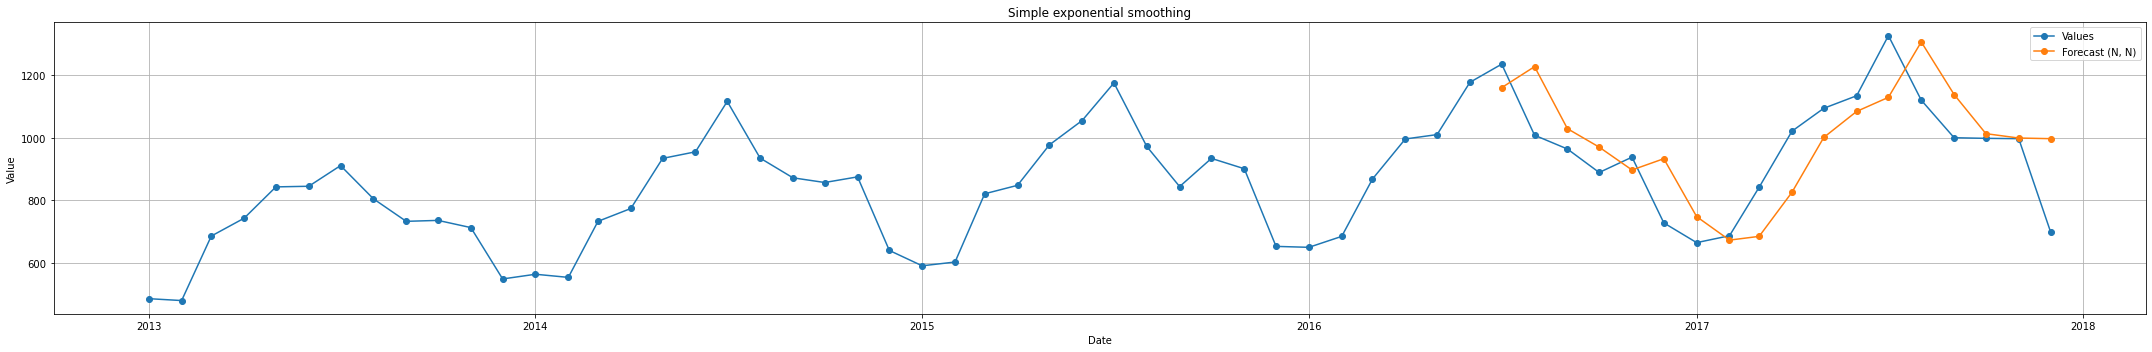

In [87]:
train_size = int(len(df) * 0.7)
train, test = df[:train_size], df[train_size:]

mae_N_N, rmse_N_N, aic_N_N, bic_N_N, data_N_N = get_metrics_N_N(train, test, alpha_N_N)

table = pd.DataFrame(columns={"Model" : 1, "MAE": 2, "RMSE": 3, "AIC": 4, "BIC": 4})
table.loc[len(table)] = ["(N, N)", mae_N_N, rmse_N_N, aic_N_N, bic_N_N]
display(table.style.hide_index()) 

df_N_N = pd.DataFrame({'date': test['date'], 'value': data_N_N})

plt.figure(figsize=(30, 5))
plt.plot(df['date'], df['value'], marker='o', label='Values')
plt.plot(df_N_N['date'], df_N_N['value'], marker='o', label='Forecast (N, N)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Simple exponential smoothing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model (N, M)

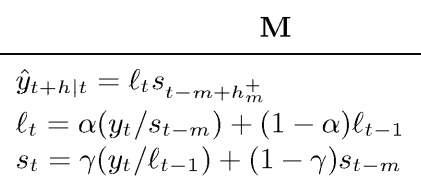

In [88]:
def N_M_chart(df, smoothed_values) :
    plt.figure(figsize=(30, 5))
    plt.plot(df['date'], df['value'], label='Values', marker='o')
    plt.plot(df['date'], smoothed_values, label='Smoothed values', marker='x')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Exponential smoothing (model (N, M))')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

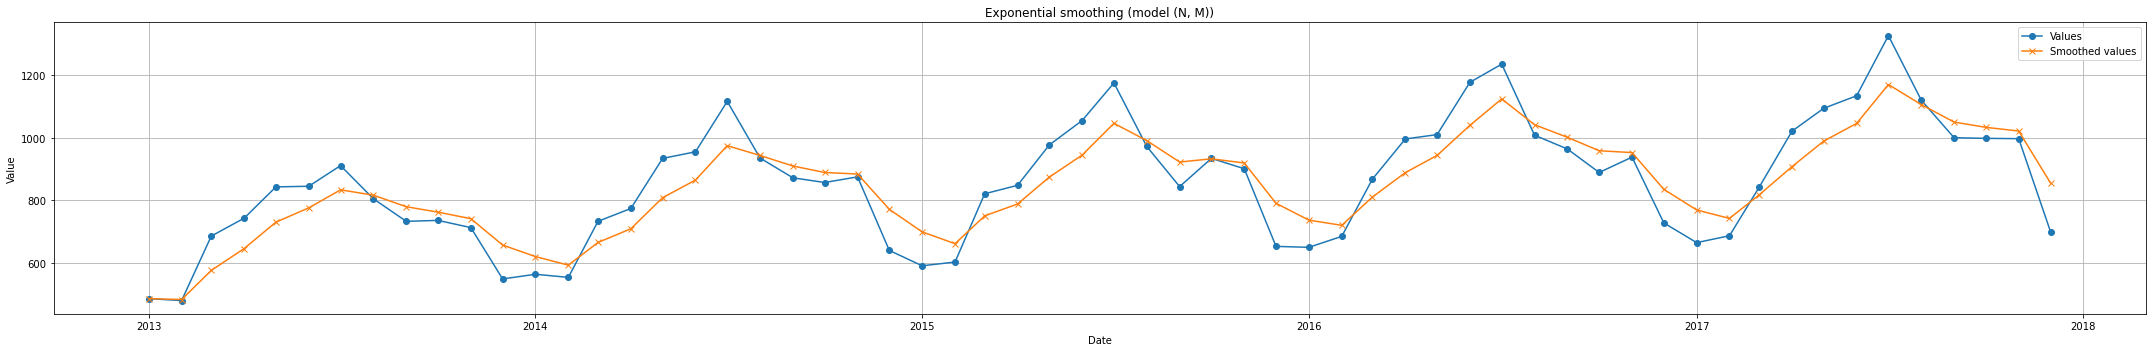

In [89]:
def exponential_smoothing_N_M(values, season, alpha, gamma):
    # l_t = pd.concat([pd.Series(values.iloc[0]), values], ignore_index=True)

    # smoothed_values = pd.Series(index=values.index, dtype=float)

    # s_t = pd.concat([ pd.Series([0.2] * 12), values], ignore_index=True)
    
    # for t in range(len(values)):
    #     l_t[t + 1] = alpha * (values[t] / s_t[t]) + (1 - alpha) * l_t[t]
    #     s_t[t + season] = gamma * (values[t] / l_t[t]) + (1 - gamma) * s_t[t]
    #     smoothed_values[t] = l_t[t + 1] * s_t[t + season]
    
    l_t = []
    l_t.append(values.iloc[0])
    s_t = [1] * season
    smoothed_values = []
    
    for t in range(len(values)):
        l = alpha * (values[t] / s_t[t]) + (1 - alpha) * l_t[t]
        s = gamma * (values[t] / l_t[t]) + (1 - gamma) * s_t[t]
        l_t.append(l)
        s_t.append(s)
        smoothed_values.append( l * s)

    return pd.Series(smoothed_values)

season = 12
alpha = 0.4
gamma = 0.05

smoothed_values_N_M = exponential_smoothing_N_M(df['value'], season, alpha, gamma)

N_M_chart(df, smoothed_values_N_M)

alpha,gamma,RMSE
0.400000,0.390000,121.464448


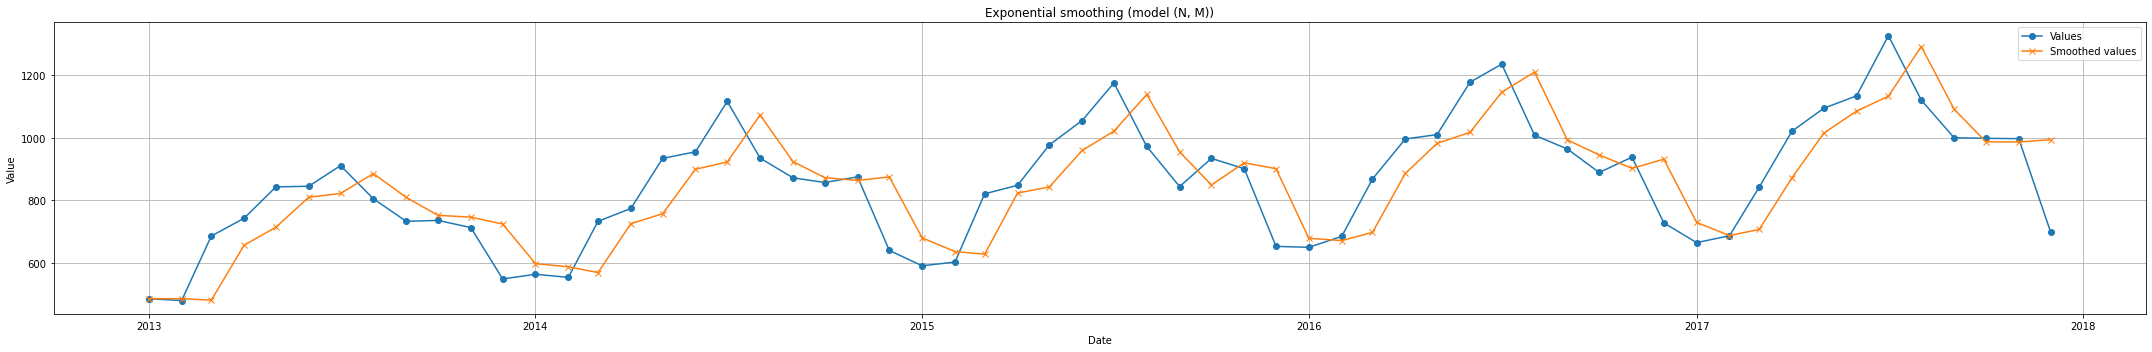

In [90]:
def N_M_fit(df, season) :
    best_val = best_alpha = best_gamma = 0

    best_rmse = sys.float_info.max

    alphas = np.arange(0.1, 1, 0.1)

    for current_alpha in alphas: 
        
        gammas = np.arange(0.01, current_alpha, 0.01)
        
        for current_gamma in gammas: 

            smoothing_val = exponential_smoothing_N_M(df['value'], season, current_alpha, current_gamma)
            
            current_val = pd.concat([pd.Series(smoothing_val[0]), smoothing_val], ignore_index=True)
            current_val = current_val.iloc[:-1]

            # current_rmse = np.sqrt(mean_squared_error(df['value'], current_val))
            # current_rmse = np.sqrt(mean_squared_error(smoothing_val, current_val))
            
            squared = [(df['value'][i] - current_val[i])**2 for i in range(len(smoothing_val))]
            current_rmse =  np.sqrt(np.sum(squared) / len(df['value']))

            if current_rmse < best_rmse :
                best_val = current_val
                best_rmse = current_rmse
                best_alpha = current_alpha
                best_gamma = current_gamma
            
    return best_val, best_rmse, best_alpha, best_gamma

smoothed_values_N_M, rmse_N_M, alpha_N_M, gamma_N_M = N_M_fit(df, season)

table = pd.DataFrame(columns={"alpha" : 1,"gamma": 2,"RMSE": 3})
table.loc[len(table)] = [alpha_N_M, gamma_N_M, rmse_N_M]
display(table.style.hide_index()) 

N_M_chart(df, smoothed_values_N_M)

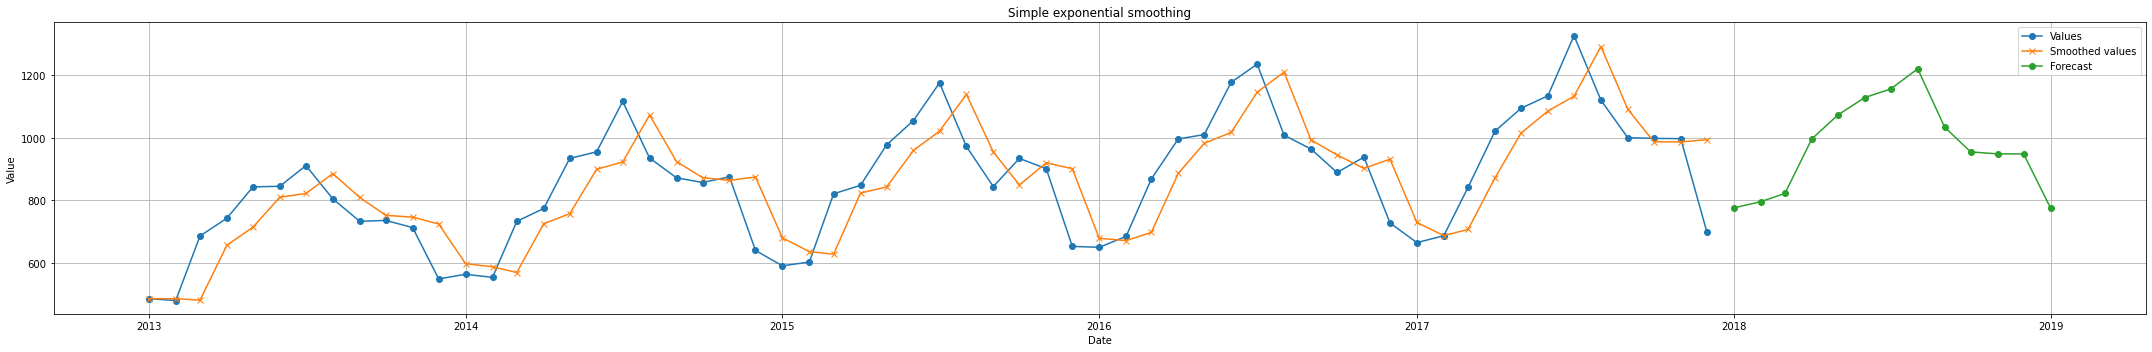

In [91]:
def forecast_N_M(df, alpha, gamma, season, steps) :    
    l_t = []
    l_t.append(df['value'].iloc[0])
    s_t = [1] * season
    smoothed_values = []
    
    for t in range(len(df['value'])):
        l = alpha * (df['value'][t] / s_t[t]) + (1 - alpha) * l_t[t]
        s = gamma * (df['value'][t] / l_t[t]) + (1 - gamma) * s_t[t]
        l_t.append(l)
        s_t.append(s)
        smoothed_values.append( l * s)

    forecast_values = []
    forecast_values.append(smoothed_values[len(smoothed_values) - 1])

    last_season = s_t[-steps:]
    last_l = l_t[len(l_t)-1]

    for s in last_season:
        forecast_values.append(last_l * s)
    
    forecast_dates = pd.Series(pd.date_range(start=df['date'].iloc[-1], periods=len(forecast_values)+1, freq='MS')[1:])

    forecast_df_N_M = pd.DataFrame({'date': forecast_dates,
                            'value': forecast_values})


    return forecast_df_N_M, smoothed_values

steps = 12
forecast_df_N_M, sm_val = forecast_N_M(df, 0.2, 0.2, season, steps)

plt.figure(figsize=(30, 5))
plt.plot(df['date'], df['value'], label='Values', marker='o')
plt.plot(df['date'], smoothed_values_N_M, label='Smoothed values', marker='x')
plt.plot(forecast_df_N_M['date'], forecast_df_N_M['value'], label='Forecast', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Simple exponential smoothing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Model,MAE,RMSE,AIC,BIC
"(N, N)",117.388889,143.347480,228.938898,230.719641
"(N, M)",100.467575,125.497503,212.318339,214.099082


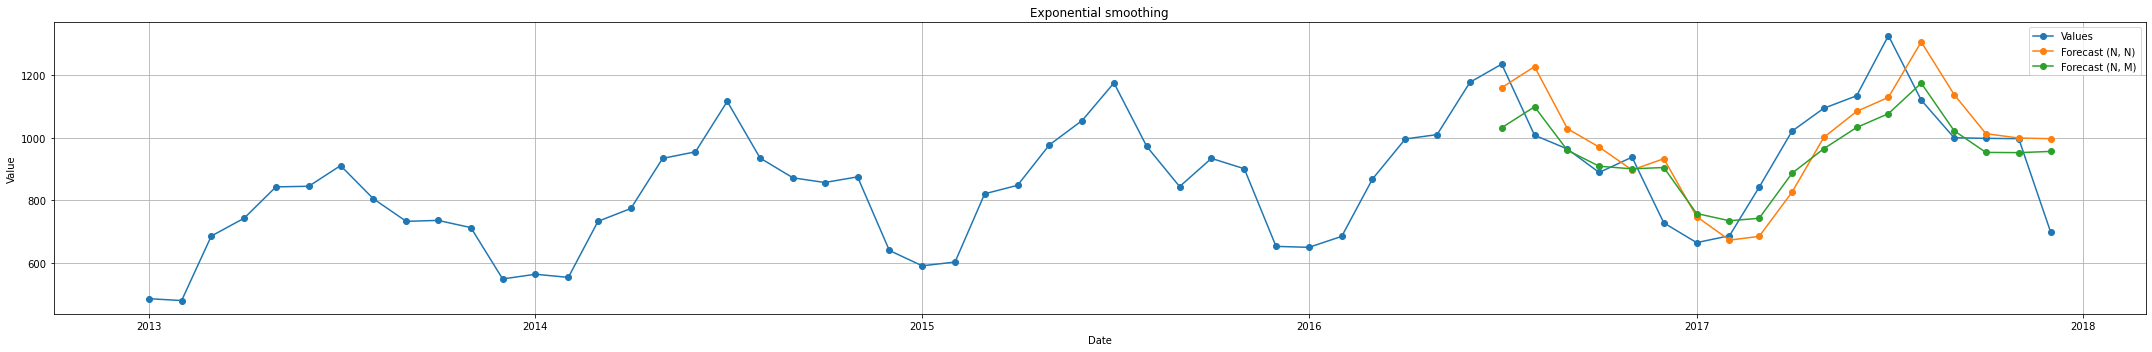

In [92]:
def get_metrics_N_M(train, test, season, alpha, gamma) :
    predictions = []

    for i in range(len(test)):
        smoothing_val = exponential_smoothing_N_M(train['value'], season, alpha, gamma)

        forecast = smoothing_val[len(smoothing_val) - 1]

        predictions.append(forecast)

        train = pd.concat([train, test.iloc[[i]]])

    mae = mean_absolute_error(test['value'], predictions)
    rmse = np.sqrt(mean_squared_error(test['value'], predictions))
    
    X = sm.add_constant(test['value'])

    model = sm.OLS(predictions, X)
    results = model.fit()

    aic = results.aic
    bic = results.bic
    
    return mae, rmse, aic, bic, predictions

train_size = int(len(df) * 0.7)
train, test = df[:train_size], df[train_size:]

mae_N_M, rmse_N_M, aic_N_M, bic_N_M, data_N_M = get_metrics_N_M(train, test, 12, 0.1, 0.2)

table = pd.DataFrame(columns={"Model" : 1, "MAE": 2, "RMSE": 3, "AIC": 4, "BIC": 4})
table.loc[len(table)] = ["(N, N)", mae_N_N, rmse_N_N, aic_N_N, bic_N_N]
table.loc[len(table)] = ["(N, M)", mae_N_M, rmse_N_M, aic_N_M, bic_N_M]
display(table.style.hide_index()) 

df_N_M = pd.DataFrame({'date': test['date'], 'value': data_N_M})

plt.figure(figsize=(30, 5))
plt.plot(df['date'], df['value'], marker='o', label='Values')
plt.plot(df_N_N['date'], df_N_N['value'], marker='o', label='Forecast (N, N)')
plt.plot(df_N_M['date'], df_N_M['value'], marker='o', label='Forecast (N, M)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Exponential smoothing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# a = b = c = 10
# print(a, b, c)
# print(1, 2, 3)
# a = input()
# print(a, type(a), type("11"))
x = '''ffff
""''ffff
ffff'''
y = 2
print(x, y, type(x), type(y))

ffff
""''ffff
ffff 2 <class 'str'> <class 'int'>


### 3. Яка з двох моделей дає якісніші прогнози? Для відповіді на це питання проаналізуйте побудовані графіки та порівняйте метрики якості MAE і RMSE для двох моделей (а також AIC, BIC, якщо їх розраховували).

Модель (N, M) дає кращі результати через сезонність даних